In [133]:
%reset
import subprocess, psutil, time, json, pandas, math, numpy, threading
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter

'''class ScalarFormatterClass(ScalarFormatter):
   def _set_format(self):
      self.format = "%1.2f"
'''


'class ScalarFormatterClass(ScalarFormatter):\n   def _set_format(self):\n      self.format = "%1.2f"\n'

## Memory Consumption Plots

#### Setup

[0.818, 2.802, 8.268, 8.318, 28.979, 92.004, 105.958, 107.594]
<class 'numpy.ndarray'>


/tmp/ipykernel_11428/1945846229.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pastel_cmap = cm.get_cmap('Pastel1')


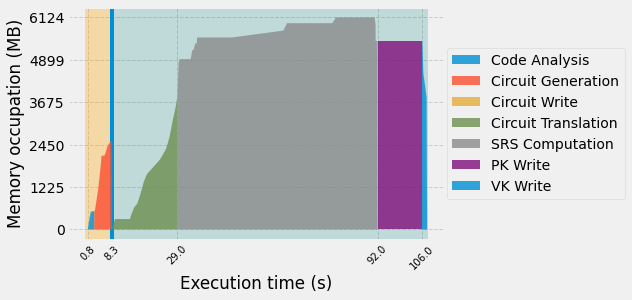

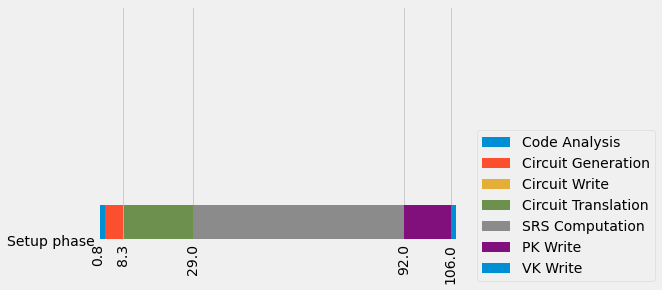

In [134]:
circuit = 'HTTP_String'
pastel_cmap = cm.get_cmap('Pastel1')
df_temp = pandas.read_json("outputs/all/setup_"+circuit+"_output.json").round(3)
df_temp.columns = ['output', 'timestamp']
#print(df.to_string())
timestamps=df_temp['timestamp']
df_temp = df_temp.iloc[:, [1,0]]
df_temp.set_index('timestamp')

df = pandas.read_json("outputs/all/setup_"+circuit+"_memory.json").round(3)
df.columns = ['memory', 'timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')
#df_temp['timestamp'].add(last_time)
#df=df.append(df_temp,ignore_index=True)
#print(df.to_string())
#print(df.to_string())
#print(df_temp.to_string())
timestamps=df_temp['timestamp']

highlights = [timestamps[0], timestamps[96], timestamps[102], timestamps[108], timestamps[118], timestamps[191], timestamps[192], timestamps[199]]
print(highlights)
labels = ["Code Analysis", "Circuit Generation", "Circuit Write", "Circuit Translation", "SRS Computation", "PK Write", "VK Write"]
df.set_index('timestamp') 
df_temp.set_index('timestamp')
df = df.merge(df_temp, how = 'outer')
df['memory'] = df['memory'].fillna(value=0)
#print(df.to_string())


plt.figure()

#print(plt.style.available)
plt.style.use('fivethirtyeight')
plt.plot(df['timestamp'], df['memory'], linewidth=0, zorder=3)

#print(df['timestamp'] in highlights)
#print(df[df['timestamp'] in highlights].to_string())

ticks=[]
for tick in highlights:
	if not ticks or ticks[-1]<tick-2:
		ticks.append(tick)
plt.xlabel("Execution time (s)")
plt.ylabel("Memory occupation (MB)")
print(type(numpy.arange(0, max(df['memory']), step=max(df['memory'])/5)))
plt.yticks(numpy.append(numpy.arange(0, max(df['memory']), step=max(df['memory'])/5), max(df['memory'])))
#plt.xticks(numpy.arange(0, max(df['timestamp']), step=max(df['timestamp'])/5))
plt.xticks(ticks, rotation = 45, fontsize=10)

for (i,instant) in enumerate(highlights[:-1]):
	index = df['timestamp'].between(highlights[i], highlights[i+1], inclusive="both")
	plt.fill_between(df['timestamp'][index], df['memory'][index], label=labels[i], alpha=0.8, zorder=4+i)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5)).set_zorder(100)
plt.grid(linestyle = '--', linewidth = 1, zorder=2)
plt.axvspan(0, highlights[3], color='orange', alpha=0.3, zorder=1)
plt.axvspan(highlights[3], highlights[-1], color='teal', alpha=0.2, zorder=1)
plt.axvline(highlights[3])

plt.show()

for (i, instant) in enumerate(highlights[:-1]):
    plt.barh("Setup phase", highlights[i+1]-highlights[i], height=0.3, left = (highlights[i]), label=labels[i])
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.xticks(ticks, rotation=90)
plt.ylim(0,1)

plt.show()
 


##END SETUP###


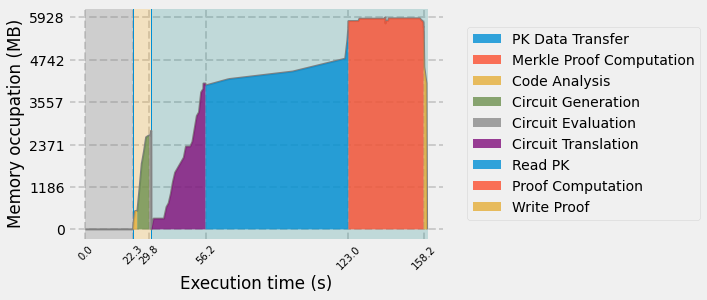

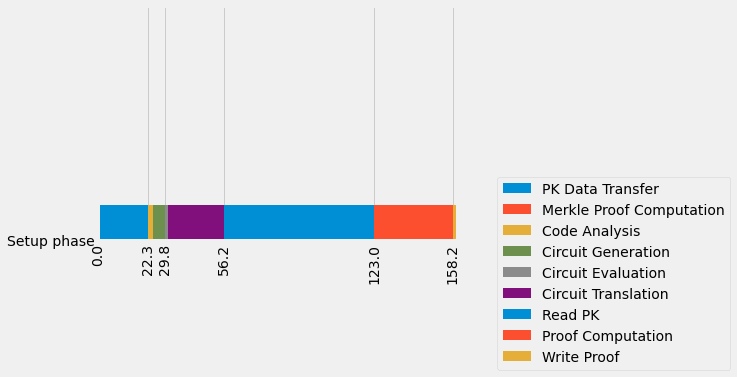

In [135]:
max_memory = []
exec_time = []
circuit = 'HTTP_String'

###PROVE###
###SETUP PLOT###
df2 = pandas.read_json("outputs/all/prove_"+circuit+"_output.json").round(5)
df2.columns = ['output', 'timestamp']
timestamps=df2['timestamp']
df2 = df2.iloc[:, [1,0]]
df2.set_index('timestamp')
#print(df2.to_string())
#print("___________________________________________________________")

df = pandas.read_json("outputs/all/prove_"+circuit+"_memory.json").round(5)
df.columns = ['memory', 'timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')
#print(df.to_string())
#print(df.to_string())
#print(df2.to_string())
#print(df[:300].to_string())
df = df.merge(df2, how = 'outer')
df = df.sort_values('timestamp').reset_index(drop=True)
df['memory'] = df['memory'].fillna(value=0)
max_memory = [max(df['memory'])]
exec_time = df['timestamp'].tail(1).values[0]


timestamps=df['timestamp']
highlights = [timestamps[0], timestamps[1], timestamps[3], timestamps[102], timestamps[114], timestamps[351], timestamps[385], timestamps[451], timestamps[546], timestamps[549]]
labels = ["PK Data Transfer", "Merkle Proof Computation", "Code Analysis", "Circuit Generation", "Circuit Evaluation", "Circuit Translation", "Read PK", "Proof Computation", "Write Proof"]

plt.figure()

#print(plt.style.available)
plt.style.use('fivethirtyeight')
plt.plot(df['timestamp'], df['memory'], linewidth=2, zorder=3, color='grey')

#print(df['timestamp'] in highlights)
#print(df[df['timestamp'] in highlights].to_string())

ticks=[]
for tick in highlights:
	if not ticks or ticks[-1]<tick-3:
		ticks.append(tick)
plt.xlabel("Execution time (s)")
plt.ylabel("Memory occupation (MB)")
#rint(type(numpy.arange(0, max(df['memory']), step=max(df['memory'])/5)))
plt.yticks(numpy.append(numpy.arange(0, max(df['memory']), step=max(df['memory'])/5), max(df['memory'])))
#plt.xticks(numpy.arange(0, max(df['timestamp']), step=max(df['timestamp'])/5))
plt.xticks(ticks, rotation = 45, fontsize=10)

for (i,instant) in enumerate(highlights[:-1]):
	index = df['timestamp'].between(highlights[i], highlights[i+1], inclusive="both")
	plt.fill_between(df['timestamp'][index], df['memory'][index], label=labels[i], alpha=0.8, zorder=4+i)
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5)).set_zorder(100)
plt.grid(linestyle = '--', linewidth = 2, zorder=20)
plt.axvspan(0, highlights[2], alpha=0.3, color='grey', zorder=1)
plt.axvspan(highlights[2], highlights[5], alpha=0.2, color='orange', zorder=1)
plt.axvspan(highlights[5], highlights[-1], alpha=0.2, color='teal', zorder=1)

plt.axvline(highlights[2], linewidth=1)
plt.axvline(highlights[5], linewidth=1)

plt.show()

plt.show()

for (i, instant) in enumerate(highlights[:-1]):
    plt.barh("Setup phase", highlights[i+1]-highlights[i], height=0.3, left = (highlights[i]), label=labels[i])
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.3))
plt.xticks(ticks, rotation=90)
plt.ylim(0,1)
plt.show()

     timestamp    memory                                                                                                                                                               output
0        0.000     0.000                                                                                                                                                       Proof received
1        0.000     0.000                                                                                                                                              Verification starts now
2        0.003     0.221                                                                                                                                                                  NaN
3        0.023     0.000                                                                                                   [1st Phase] Running Initial Circuit Analysis for < HTTP_String >\n
4        0.026    34.050                          

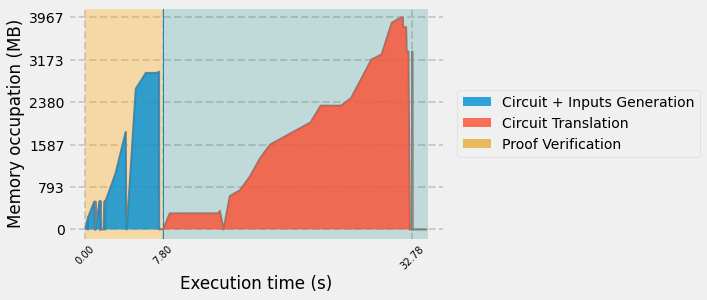

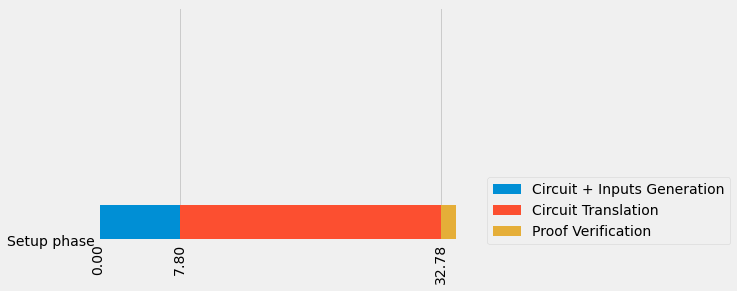

In [136]:
circuit = "HTTP_String"
df2 = pandas.read_json("outputs/all/verify_"+circuit+"_output.json").round(3)
df2.columns = ['output', 'timestamp']
timestamps=df2['timestamp']
df2 = df2.iloc[:, [1,0]]
df2.set_index('timestamp')
#print(df2.to_string())
#print("___________________________________________________________")
timestamps=df2['timestamp']

highlights = [timestamps[0], timestamps[110], timestamps[125], timestamps[153]]#, timestamps[114], timestamps[351], timestamps[385], timestamps[451], timestamps[546], timestamps[549]]
df = pandas.read_json("outputs/all/verify_"+circuit+"_memory.json").round(3)
df.columns = ['memory', 'timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')
#print(df.to_string())
#print(df.to_string())
#print(df2.to_string())
#print(df[:300].to_string())
df = df.merge(df2, how = 'outer')
df = df.sort_values('timestamp').reset_index(drop=True)
df['memory'] = df['memory'].fillna(value=0)
print(df.to_string())

print(highlights)
labels = ["Circuit + Inputs Generation", "Circuit Translation", "Proof Verification"]

plt.figure()

#print(plt.style.available)
plt.style.use('fivethirtyeight')
plt.plot(df['timestamp'], df['memory'], linewidth=2, zorder=3, color='grey')

#print(df['timestamp'] in highlights)
#print(df[df['timestamp'] in highlights].to_string())

ticks=[]
for tick in highlights:
	if not ticks or ticks[-1]<tick-3:
		ticks.append(tick)
plt.xlabel("Execution time (s)")
plt.ylabel("Memory occupation (MB)")
plt.yticks(numpy.append(numpy.arange(0, max(df['memory']), step=max(df['memory'])/5), max(df['memory'])))
#plt.xticks(numpy.arange(0, max(df['timestamp']), step=max(df['timestamp'])/5))
plt.xticks(ticks, rotation = 45, fontsize=10)

for (i,instant) in enumerate(highlights[:-1]):
	index = df['timestamp'].between(highlights[i], highlights[i+1], inclusive="both")
	plt.fill_between(df['timestamp'][index], df['memory'][index], label=labels[i], alpha=0.8, zorder=4+i)
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5)).set_zorder(100)
plt.grid(linestyle = '--', linewidth = 2, zorder=20)
plt.axvspan(0, highlights[1], alpha=0.3, color='orange', zorder=1)
plt.axvspan(highlights[1], highlights[-1], alpha=0.2, color='teal', zorder=1)

plt.axvline(highlights[1], linewidth=1)
#plt.axvline(highlights[], linewidth=1)


plt.show()

for (i, instant) in enumerate(highlights[:-1]):
    plt.barh("Setup phase", highlights[i+1]-highlights[i], height=0.3, left = (highlights[i]), label=labels[i])
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.3))
plt.xticks(ticks, rotation=90)
plt.ylim(0,1)
plt.show()

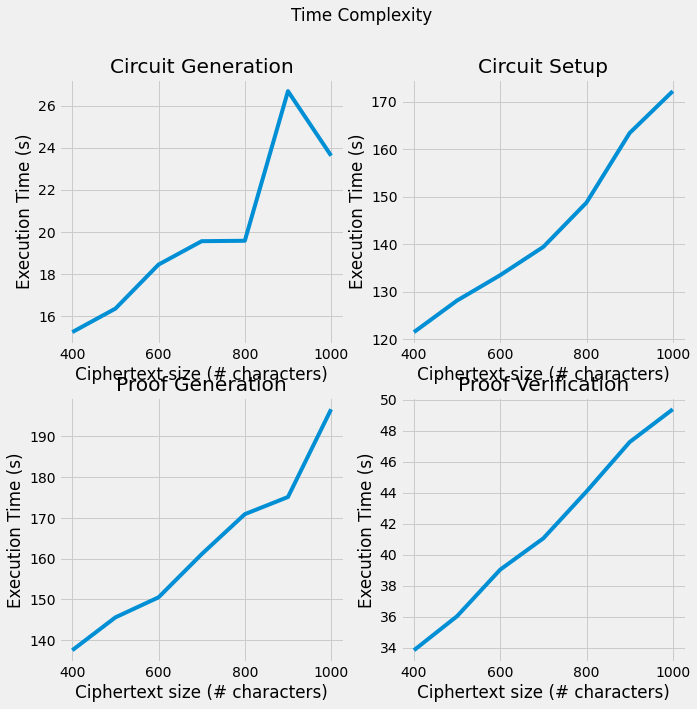

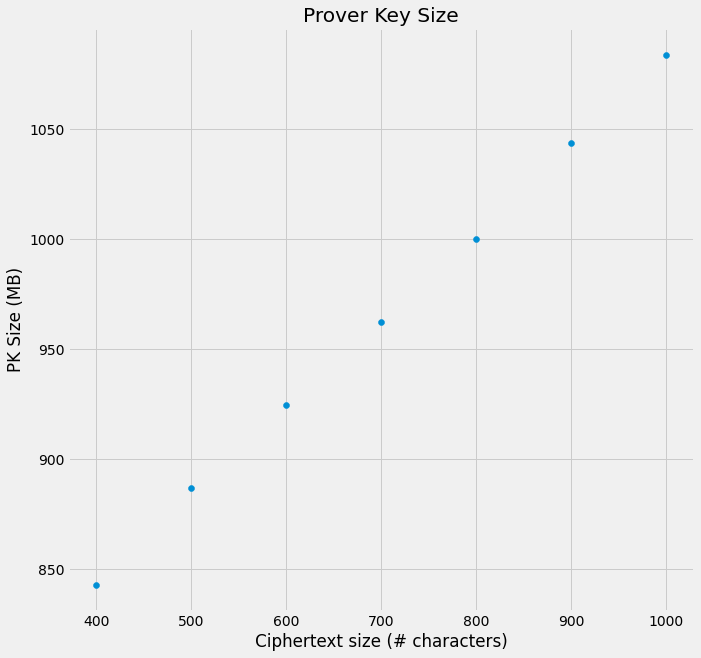

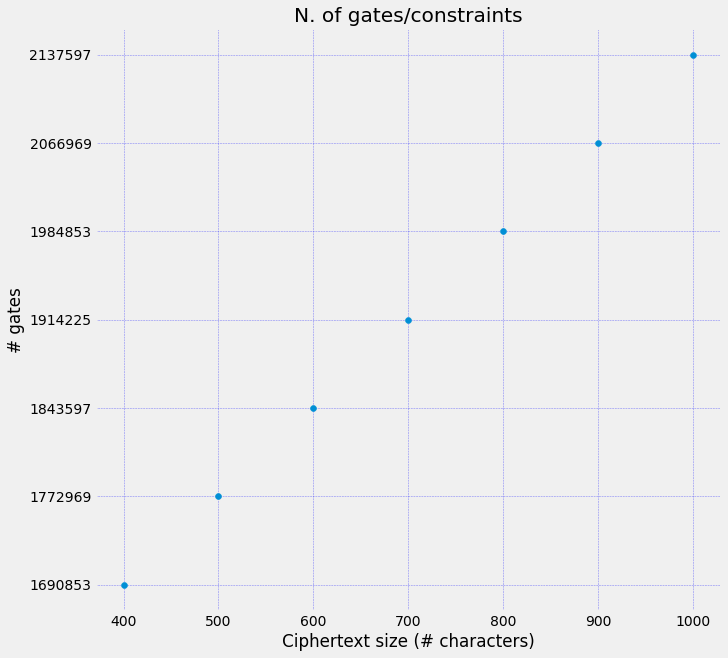

In [137]:
pk_size = []
circuit='HTTP_String'
start=400
end=1100
fig_times, axs_time = plt.subplots(2, 2, figsize=(10, 10))

#fig_times = plt.figure()
ytitle_times = "Execution Time (s)"
xtitle = "Ciphertext size (# characters)"

num_gates=[]
times = pandas.DataFrame(columns = ['run', 'times'])
for i in range(start, end, 100):
    df = pandas.read_json("outputs/"+circuit+"/run1/output/output_java_"+circuit+"_"+str(i)+"_1.json").round(5)
    df.columns = ['output', 'timestamp']
    num_gates += [df['output'].iloc[99].split()[-1]]
    times.loc[len(times)] = {'times': df['timestamp'].tail(1).values[0], 'run': i}
    #times = times.append({'times': df['timestamp'].tail(1).values[0], 'run': i}, ignore_index=True)

timestamps=df['timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')

axs_time[0][0].plot(times['run'], times['times'])
axs_time[0][0].set_title('Circuit Generation')
axs_time[0][0].set_xlabel(xtitle)
axs_time[0][0].set_ylabel(ytitle_times)

#plt.show()
fig_times.suptitle("Time Complexity")


pksizes = []
times = pandas.DataFrame(columns = ['run', 'times'])
for i in range(start, end, 100):
    df = pandas.read_json("outputs/"+circuit+"/run1/output/output_libsnark_setup_"+circuit+"_"+str(i)+"_1.json").round(5)
    df.columns = ['output', 'timestamp']
    pksizes+=[round(df['timestamp'].tail(2).values[0]/1000000, 2)]
    df = df[:-2]
    #print(df)
    times.loc[len(times)] = {'times': df['timestamp'].tail(1).values[0], 'run': i}

    
timestamps=df['timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')

axs_time[0][1].plot(times['run'], times['times'])
axs_time[0][1].set_title('Circuit Setup')
axs_time[0][1].set_xlabel(xtitle)
axs_time[0][1].set_ylabel(ytitle_times)



times = pandas.DataFrame(columns = ['run', 'times'])
for i in range(start, end, 100):
    df = pandas.read_json("outputs/"+circuit+"/run1/output/output_libsnark_prove_"+circuit+"_"+str(i)+"_1.json").round(5)
    df.columns = ['output', 'timestamp']
    #print(df)
    times.loc[len(times)] = {'times': df['timestamp'].tail(1).values[0], 'run': i}
    #times = times.append({'times': df['timestamp'].tail(1).values[0], 'run': i}, ignore_index=True)
#print(times)
timestamps=df['timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')


axs_time[1][0].plot(times['run'], times['times'])
axs_time[1][0].set_title("Proof Generation")
axs_time[1][0].set_xlabel(xtitle)
axs_time[1][0].set_ylabel(ytitle_times)

times = pandas.DataFrame(columns = ['run', 'times'])
for i in range(start, end, 100):
    df = pandas.read_json("outputs/"+circuit+"/run1/output/output_libsnark_verify_"+circuit+"_"+str(i)+"_1.json").round(5)
    df.columns = ['output', 'timestamp']
    #print(df)
    times.loc[len(times)] = {'times': df['timestamp'].tail(1).values[0], 'run': i}
    #times = times.append({'times': df['timestamp'].tail(1).values[0], 'run': i}, ignore_index=True)
#print(times)
timestamps=df['timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')
pk_size = [pksizes[1]]

axs_time[1][1].plot(times['run'], times['times'])
axs_time[1][1].set_title('Proof Verification')
axs_time[1][1].set_xlabel(xtitle)
axs_time[1][1].set_ylabel(ytitle_times)

#fig_times.tight_layout(pad=1.0)

#fig_times.show()

fig_pksize, ax_pksize = plt.subplots(figsize=(10, 10))
ax_pksize.scatter(times['run'], pksizes)
ax_pksize.set_title("Prover Key Size")
ax_pksize.set_xlabel(xtitle)
ax_pksize.set_ylabel("PK Size (MB)")


#formatter = ticker.ScalarFormatter(useMathText=True)
#formatter.set_scientific(True) 
#formatter.set_powerlimits((0,0)) 
fig_ngates, ax_ngates = plt.subplots(figsize=(10, 10))
ax_ngates.scatter(times['run'], num_gates)
ax_ngates.set_title("N. of gates/constraints")
ax_ngates.set_xlabel(xtitle)
ax_ngates.set_ylabel("# gates")
ax_ngates.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
#yScalarFormatter = ScalarFormatterClass(useMathText=True)
#yScalarFormatter.set_powerlimits((0,0))
#ax_ngates.yaxis.set_major_formatter(yScalarFormatter)
plt.show()




[336.74641]


/tmp/ipykernel_11428/4225199492.py:101: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_times.show()


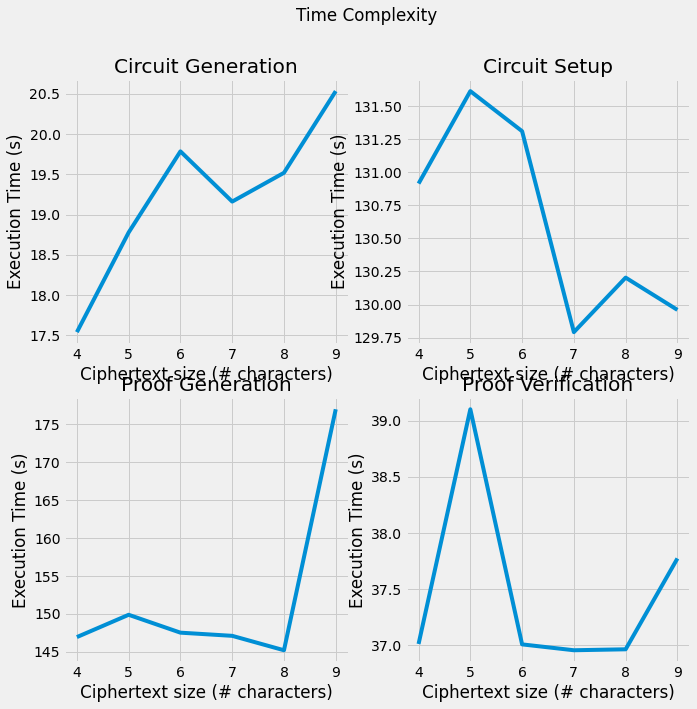

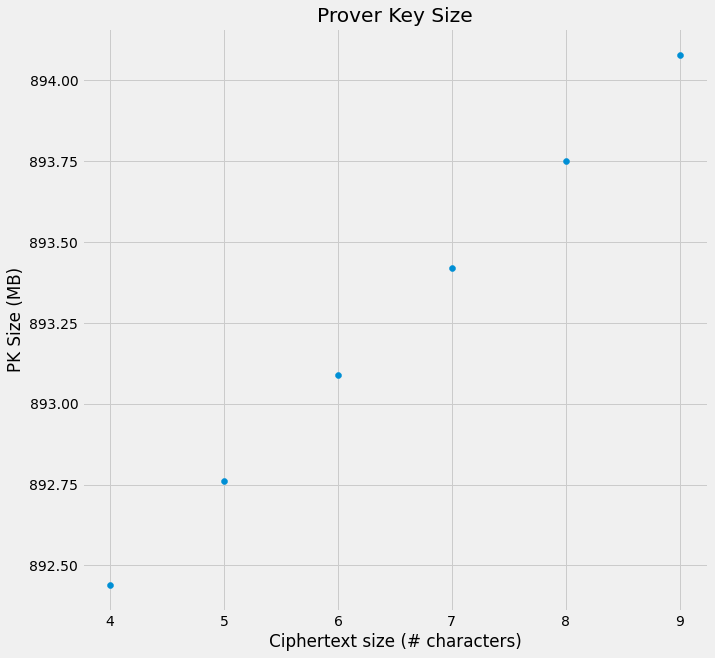

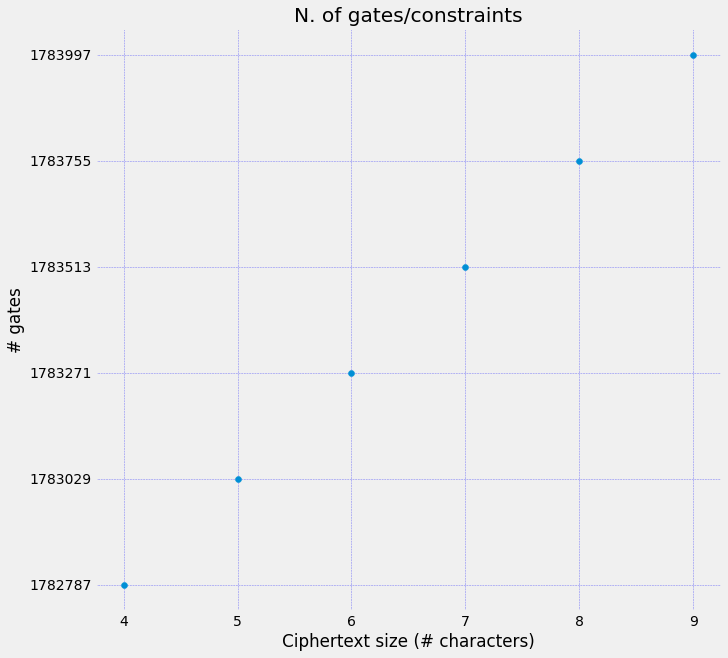

In [138]:
circuit='Test_HTTP_Merkle'
start=4
end=10
step = 1
fig_times, axs_time = plt.subplots(2, 2, figsize=(10, 10))

#fig_times = plt.figure()
ytitle_times = "Execution Time (s)"
xtitle = "Ciphertext size (# characters)"


df = pandas.read_json("outputs/"+circuit+"/run1/memory/memory_libsnark_prove_"+circuit+"4_1.json").round(5)
df.columns = ['memory', 'timestamp']
max_memory += [max(df['memory'])]

num_gates=[]
times = pandas.DataFrame(columns = ['run', 'times'])
for i in range(start, end, step):
    df = pandas.read_json("outputs/"+circuit+"/run1/output/output_java_"+circuit+str(i)+"_1.json").round(5)
    df.columns = ['output', 'timestamp']
    num_gates += [df['output'].iloc[90].split()[-1]]
    times.loc[len(times)] = {'times': df['timestamp'].tail(1).values[0], 'run': i}
    #times = times.append({'times': df['timestamp'].tail(1).values[0], 'run': i}, ignore_index=True)

timestamps=df['timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')

axs_time[0][0].plot(times['run'], times['times'])
axs_time[0][0].set_title('Circuit Generation')
axs_time[0][0].set_xlabel(xtitle)
axs_time[0][0].set_ylabel(ytitle_times)

#plt.show()
fig_times.suptitle("Time Complexity")


pksizes = []
times = pandas.DataFrame(columns = ['run', 'times'])
for i in range(start, end, step):
    df = pandas.read_json("outputs/"+circuit+"/run1/output/output_libsnark_setup_"+circuit+str(i)+"_1.json").round(5)
    df.columns = ['output', 'timestamp']
    pksizes+=[round(df['timestamp'].tail(2).values[0]/1000000, 2)]
    
    df = df[:-2]
    #print(df)
    times.loc[len(times)] = {'times': df['timestamp'].tail(1).values[0], 'run': i}

pk_size += [pksizes[0]]
    
timestamps=df['timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')

axs_time[0][1].plot(times['run'], times['times'])
axs_time[0][1].set_title('Circuit Setup')
axs_time[0][1].set_xlabel(xtitle)
axs_time[0][1].set_ylabel(ytitle_times)



times = pandas.DataFrame(columns = ['run', 'times'])
for i in range(start, end, step):
    df = pandas.read_json("outputs/"+circuit+"/run1/output/output_libsnark_prove_"+circuit+str(i)+"_1.json").round(5)
    df.columns = ['output', 'timestamp']
    #print(df)
    times.loc[len(times)] = {'times': df['timestamp'].tail(1).values[0], 'run': i}
    #times = times.append({'times': df['timestamp'].tail(1).values[0], 'run': i}, ignore_index=True)
#print(times)
timestamps=df['timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')
exec_time += [timestamps.tail(1).values[0]]
print(exec_time)

axs_time[1][0].plot(times['run'], times['times'])
axs_time[1][0].set_title("Proof Generation")
axs_time[1][0].set_xlabel(xtitle)
axs_time[1][0].set_ylabel(ytitle_times)

times = pandas.DataFrame(columns = ['run', 'times'])
for i in range(start, end, step):
    df = pandas.read_json("outputs/"+circuit+"/run1/output/output_libsnark_verify_"+circuit+str(i)+"_1.json").round(5)
    df.columns = ['output', 'timestamp']
    #print(df)
    times.loc[len(times)] = {'times': df['timestamp'].tail(1).values[0], 'run': i}
    #times = times.append({'times': df['timestamp'].tail(1).values[0], 'run': i}, ignore_index=True)
#print(times)
timestamps=df['timestamp']
df = df.iloc[:, [1,0]]
df.set_index('timestamp')


axs_time[1][1].plot(times['run'], times['times'])
axs_time[1][1].set_title('Proof Verification')
axs_time[1][1].set_xlabel(xtitle)
axs_time[1][1].set_ylabel(ytitle_times)

#fig_times.tight_layout(pad=1.0)

fig_times.show()

fig_pksize, ax_pksize = plt.subplots(figsize=(10, 10))
ax_pksize.scatter(times['run'], pksizes)
ax_pksize.set_title("Prover Key Size")
ax_pksize.set_xlabel(xtitle)
ax_pksize.set_ylabel("PK Size (MB)")


#formatter = ticker.ScalarFormatter(useMathText=True)
#formatter.set_scientific(True) 
#formatter.set_powerlimits((0,0)) 
fig_ngates, ax_ngates = plt.subplots(figsize=(10, 10))
ax_ngates.scatter(times['run'], num_gates)
ax_ngates.set_title("N. of gates/constraints")
ax_ngates.set_xlabel(xtitle)
ax_ngates.set_ylabel("# gates")
ax_ngates.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
#yScalarFormatter = ScalarFormatterClass(useMathText=True)
#yScalarFormatter.set_powerlimits((0,0))
#ax_ngates.yaxis.set_major_formatter(yScalarFormatter)
plt.show()


[5927.97286, 5995.12678, 3000] [886.88, 892.44, 1000]
Max Used Memory (MB)


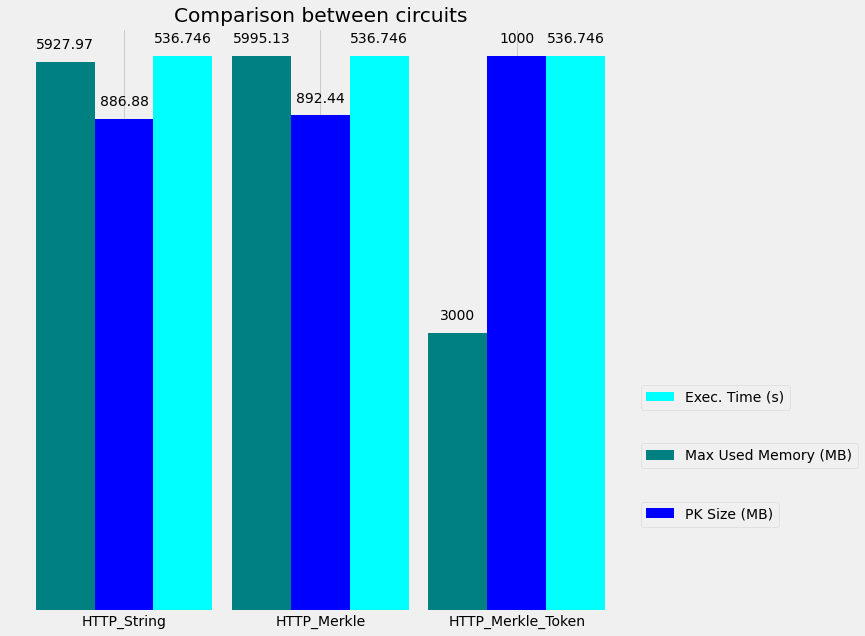

In [139]:
circuits = ["HTTP_String", "HTTP_Merkle", "HTTP_Merkle_Token"]
#max_memory = [5927.9]
#max_memory += [3000, 1000]
#pk_size = [800, 850, 1000]
exec_time += [200]
'''print(max_memory, pk_size)
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

bars = numpy.arange(len(circuits))
memo = ax.bar(bars-0.2, max_memory, 0.2, label = 'max memory')
pks = ax.bar(bars, pk_size, 0.2, label = 'pk size')
time = ax2.bar(bars+0.2, time, 0.2, label = 'time', color='orange')
#ax.bar_label(time)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')
plt.legend()
plt.xticks(bars, circuits)'''
max_memory += [3000]
pk_size += [1000]
print(max_memory, pk_size)
circuit = ["HTTP_String", "HTTP_Merkle", "HTTP_Merkle_Token"]
data = {
    'Max Used Memory (MB)': max_memory,
    'PK Size (MB)': pk_size,
    'Exec. Time (s)': exec_time,
}
items = list(data.items())

x = numpy.arange(len(circuit))  # the label locations
width = 0.3  # the width of the bars
#multiplier = 0
print(items[0][0])
fig, ax = plt.subplots(figsize=(10, 10))
rects = ax.bar(x + width*0, items[0][1], width, label=items[0][0], color = 'teal')
ax.bar_label(rects, padding=10)

ax2 = ax.twinx()
rects = ax2.bar(x + width*1, items[1][1], width, label=items[1][0], color = 'blue')
ax2.bar_label(rects, padding=10)

ax3 = ax.twinx()
rects = ax3.bar(x + width*2, items[2][1], width, label=items[2][0], color = 'cyan')
ax3.bar_label(rects, padding=10)

'''
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
'''
# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Length (mm)')
ax.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax.set_title('Comparison between circuits')
ax.set_xticks(x + width, circuits)
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.3))

ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.2))
ax3.legend(loc='upper left', bbox_to_anchor=(1, 0.4))


plt.show()
